In [1]:
%matplotlib inline
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
boston = load_boston()
df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
df['target'] = boston['target']
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(boston['data'], boston['target'], test_size=0.1)

In [4]:
# fit
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
reg.fit(x_train, y_train)

DecisionTreeRegressor()

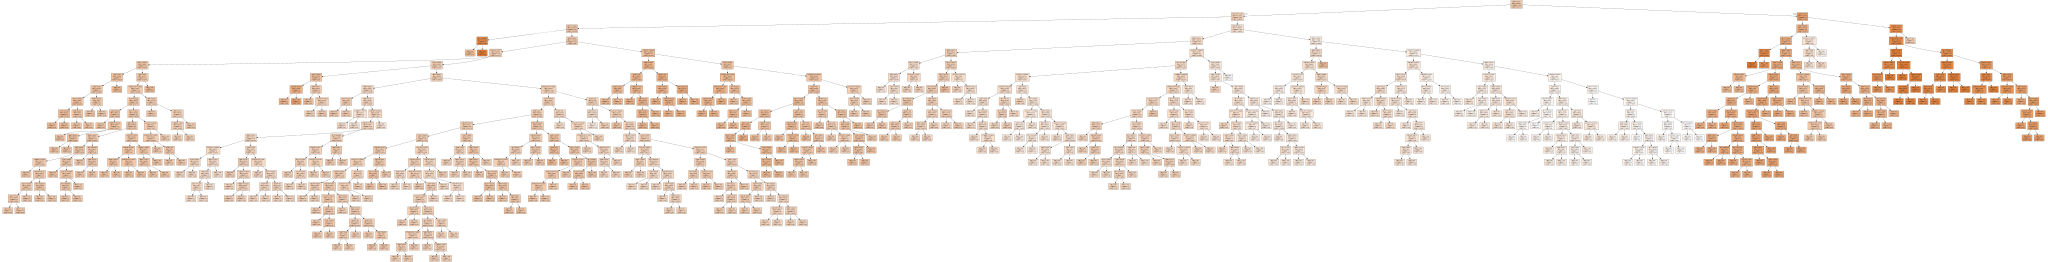

In [6]:
from sklearn.tree import export_graphviz
import graphviz

g = export_graphviz(reg, 
                    out_file=None, 
                    feature_names=boston["feature_names"],
                    filled=True)
graph = graphviz.Source(g)
graph

In [8]:
pre = reg.predict(x_test)
print('predict: ', list(pre))
print('reality: ', list(y_test))

predict:  [17.1, 25.1, 43.1, 25.0, 28.7, 19.8, 31.1, 20.7, 17.2, 25.0, 26.6, 17.1, 21.7, 20.3, 33.4, 17.7, 29.1, 23.6, 25.1, 17.8, 23.2, 13.6, 19.6, 19.1, 13.4, 11.3, 19.6, 19.5, 34.6, 17.4, 7.0, 21.7, 11.8, 21.4, 27.5, 24.4, 8.3, 31.5, 16.6, 23.0, 14.4, 21.5, 19.6, 13.4, 17.8, 18.4, 22.0, 13.3, 21.7, 8.5, 22.9]
reality:  [15.4, 29.0, 43.5, 21.1, 22.2, 19.3, 35.1, 23.3, 17.9, 22.1, 24.5, 18.0, 23.9, 21.0, 34.9, 16.1, 30.8, 23.0, 30.1, 13.1, 18.9, 14.5, 19.8, 23.1, 15.6, 12.8, 18.7, 23.1, 35.4, 14.3, 8.1, 22.6, 14.4, 20.0, 29.9, 22.2, 10.5, 22.8, 20.3, 20.2, 19.4, 19.1, 20.1, 14.3, 15.1, 14.5, 23.3, 17.3, 20.4, 7.2, 24.7]


In [11]:
from sklearn.metrics import r2_score

print("r2 score:", r2_score(y_test, pre))

r2 score: 0.8221906798011644
